In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
len(mnist.train.images),len(mnist.train.labels)

(55000, 55000)

In [9]:
len(mnist.test.images),len(mnist.test.labels)

(10000, 10000)

In [10]:
mnist.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [21]:
len(mnist.train.images[0])

784

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

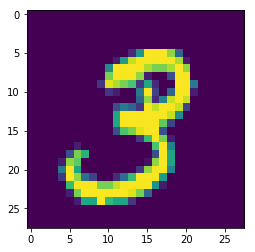

In [16]:
plt.imshow(mnist.train.images[1].reshape(28,28))

In [17]:
mnist.train.labels[1]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [22]:
x = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

In [23]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [27]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [28]:
loss = -tf.reduce_sum(y_*tf.log(y))

In [46]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [49]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(1100):
    batch = mnist.train.next_batch(50)
    sess.run(train_step,feed_dict={x: batch[0], y_: batch[1]})
    if i%50 == 0:
        print(sess.run(loss,feed_dict={x: batch[0], y_: batch[1]}))

75.7911
17.131
13.6426
21.3129
9.24063
15.4596
8.75099
33.7311
9.27062
10.8211
12.0568
30.1628
7.19666
9.05745
20.7473
15.2291
6.51641
5.64891
10.8138
14.4915
6.09355
9.21704


In [50]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [52]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [54]:
acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

In [55]:
print(acc)

0.9189


# 使用卷积神经网络

In [3]:
x = tf.placeholder("float", shape=[None,784])
y_ = tf.placeholder("float", shape=[None, 10])

In [4]:
x_image = tf.reshape(x, [-1,28,28,1])

In [5]:
conv2d_1 = tf.contrib.layers.convolution2d(
    x_image,
    num_outputs=32,
    kernel_size = (5,5),
    activation_fn = tf.nn.relu,
    stride = (1,1),
    padding='SAME',
    trainable = True)

In [6]:
pool_1 = tf.nn.max_pool(conv2d_1,
                       ksize = [1,2,2,1],
                       strides = [1,2,2,1],
                       padding='SAME')

In [7]:
conv2d_1.get_shape()

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(32)])

In [8]:
pool_1.get_shape()

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(32)])

In [9]:
conv2d_2 = tf.contrib.layers.convolution2d(
    pool_1,
    num_outputs=64,
    kernel_size = (5,5),
    activation_fn = tf.nn.relu,
    stride = (1,1),
    padding='SAME',
    trainable = True)

In [10]:
pool_2 = tf.nn.max_pool(conv2d_2,
                       ksize = [1,2,2,1],
                       strides = [1,2,2,1],
                       padding='SAME')

In [11]:
conv2d_2.get_shape()

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(64)])

In [12]:
pool_2.get_shape()

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

In [13]:
pool2_flat = tf.reshape(pool_2, [-1, 7*7*64])

In [14]:
fc_1 = tf.contrib.layers.fully_connected(
                                        pool2_flat,
                                        1024,
                                        activation_fn = tf.nn.relu)

In [15]:
keep_prob = tf.placeholder("float")
fc1_drop = tf.nn.dropout(fc_1, keep_prob)

In [16]:
fc_2 = tf.contrib.layers.fully_connected(
                                        fc1_drop,
                                        10,
                                        activation_fn = tf.nn.softmax)

In [17]:
loss = -tf.reduce_sum(y_*tf.log(fc_2))
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(20000):
    batch = mnist.train.next_batch(50)
    sess.run(train_step,feed_dict={x: batch[0], y_: batch[1],keep_prob: 0.5})
    if i%100 == 0:
        print(sess.run(loss,feed_dict={x: batch[0], y_: batch[1],keep_prob: 1}))

114.423
109.32
93.128
50.9498
27.6197
26.0763
15.2112
17.0315
15.7285
11.2648
14.7351
12.6694
13.3613
7.54031
9.23662
19.5393
9.89003
6.22238
8.91843
8.64591
4.0436
7.97426
8.59143
17.5989
6.25928
7.30175
10.4636
4.97481
2.76831
5.72452
8.51616
4.34664
2.81261
9.17246
4.63329
8.93418
10.2542
5.46262
3.38467
5.34974
3.04058
4.91888
2.85665
5.1984
3.08576
6.63704
3.69203
3.96479
4.98216
2.36167


In [18]:
correct_prediction = tf.equal(tf.argmax(fc_2,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels,keep_prob: 1})

In [19]:
print(acc)

0.987
